# Using a BERT model finetuned for financial headlines

In [249]:
# Imoprts
from newsplease import NewsPlease
import requests
from bs4 import BeautifulSoup
import unidecode
import json
import re
import numpy as np 
import matplotlib.pyplot as plt
import configparser
import tweepy as tw

In [10]:
config = configparser.RawConfigParser()
config.read(filenames = '.env')
config.read(filenames = '.env.secret')

['.env.secret']

In [30]:
access_token = config.get('twitter-api-private', 'ACCESS_TOKEN')
access_token_secret = config.get('twitter-api-private', 'ACCESS_TOKEN_SECRET')
api_key = config.get('twitter-api', 'API_KEY')
api_secret_key = config.get('twitter-api', 'API_SECRET_KEY')
bearer_token = config.get('twitter-api', 'BEARER_TOKEN')

In [118]:
search_url = "https://api.twitter.com/2/tweets/search/recent"

def bearer_oauth(r):
    r.headers["Authorization"] = "Bearer {}".format(bearer_token)
    r.headers["User-Agent"] = 'v2RecentSearchPython'
    return r

def connect_to_endpoint(url, params):
    res = requests.get(url, auth = bearer_oauth, params = params)
    print(res.status_code)
    if res.status_code != 200:
        raise Exception(res.status_code, res.text)
    return res.json()

In [119]:
json_res = connect_to_endpoint(search_url, query_params)
print(len(json_res['data']))

200
100


In [124]:
i = np.random.randint(len(json_res['data']))
print(json_res['data'][i]['text'])

~Sequoia-backed SwooshTransfer raises millions of dollars to automate cross-border payments – TechCrunch~ 
https://t.co/RBs0ygpPcZ
#bigdata #SEO #Google #Apple  #IOS #cybersecurity #Robotics #IOT #AI #nanotechnology #software

China’s export-ori...


In [129]:
# Get news from Coinmarketcap
def get_tweets(query_params, num = 100):
    res = connect_to_endpoint(search_url, query_params)
    data = res['data']
    print(len(data))
    return data

In [227]:
# Get sentiment from BERT model
def prepare_text(text):
    return unidecode.unidecode(text.strip())

def get_sentiment(texts, url = 'http://127.0.0.1:8080/tweetbert'):
    js = { 'texts': texts }
    res = requests.post(url, json = js)
    return res.json()['ans']

def get_tweet_sentiment(tweet):
    sent = get_sentiment(tweet['text'])
    return sent

In [263]:
query_params = {
    'query': 'Russia lang:en -is:retweet', #((AAPL OR TSLA OR AMZN) stock) lang:en -is:retweet',
    'max_results': 100
}

In [264]:
tweets = get_tweets(query_params)
num_tweets = len(tweets)
tweets[:10]

200
100


[{'id': '1512519778224812044',
  'text': 'How Germany Became Putin’s Enabler https://t.co/1JlfrdjLil'},
 {'id': '1512519776534417410',
  'text': "@newsmax @MorriseyWV Newsmax is not news it's Russia propaganda"},
 {'id': '1512519776291237893',
  'text': '@ZPureblood @Reuters nobody is listening to Russia. You liars are kicked from the UN. Bye.'},
 {'id': '1512519776278654991',
  'text': '@carlbildt @mfa_russia She’s making more sense than Trump though.'},
 {'id': '1512519776077328390',
  'text': '@VDombrovskis Only weapons can defeat russia. https://t.co/Y6DvpJVYyN This is a real genocide of Ukrainians. They kill us just because we exist.  They rape children, girls, elderly women. Destroy the male population.  Our homes are being wiped off the face of the earth.'},
 {'id': '1512519775930494981',
  'text': "@s_m_h442 @Amb_Ulyanov I don't think I ever said civilians are not being killed targeted whatever in Ukraine. It's a f****** War, president Zelensky announced to the world\nRussia wo

In [261]:
i = np.random.randint(len(tweets))
sents = get_tweet_sentiment(tweets[i])
# print(sents)
print(tweets[i]['text'])
print(sents)

Rusya'da Şubat ayında %9.15 olan yıllık enflasyon Mart ayında %16.69'a çıktı.

Neyse artık zam yapılacağı zaman ama #Russia'da #Enflasyon şöyle böyle dersiniz...
[[0.017496716231107712, 0.021858595311641693, 0.9606447219848633]]


In [262]:
i = np.random.randint(len(tweets))
print(tweets[i]['text'])

@jwojc Russia can only be defeated with arms. Take a look at what they've done to our cities: https://t.co/QxeBtNt1Jm This is a genocide against Ukrainians.  We appreciate any help, but only armed assistance will be able to halt this darkness, this Russia.


In [265]:
sents = get_sentiment([x['text'] for x in tweets])
sents = np.array(sents)

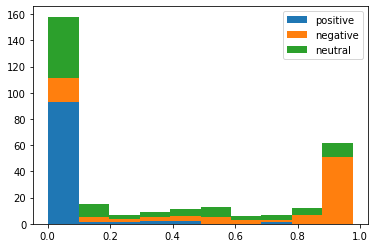

In [267]:
colors = ['positive', 'negative', 'neutral']
plt.hist(sents, histtype = 'bar', stacked=True, label = colors)
plt.legend()

In [248]:
sents

array([[1.42962979e-02, 4.27380383e-01, 5.58323383e-01],
       [5.38009591e-02, 1.10575989e-01, 8.35623085e-01],
       [3.47960778e-02, 1.04316110e-02, 9.54772234e-01],
       [9.11132619e-02, 3.64719592e-02, 8.72414827e-01],
       [9.00421917e-01, 1.03771244e-03, 9.85403284e-02],
       [9.58565056e-01, 7.52795022e-04, 4.06821929e-02],
       [9.03962731e-01, 8.89765215e-04, 9.51475352e-02],
       [1.20813243e-01, 2.57290006e-02, 8.53457749e-01],
       [9.89939392e-01, 1.52928545e-03, 8.53125565e-03],
       [9.86173391e-01, 1.38901547e-03, 1.24376025e-02],
       [7.92996213e-03, 9.17473733e-01, 7.45963082e-02],
       [3.01923696e-02, 1.47122324e-01, 8.22685301e-01],
       [1.80695094e-02, 5.31401932e-02, 9.28790390e-01],
       [2.27671906e-01, 5.00265555e-03, 7.67325521e-01],
       [3.96133699e-02, 5.79766557e-03, 9.54588950e-01],
       [1.00926459e-01, 1.65204995e-03, 8.97421479e-01],
       [3.35616350e-01, 1.42892962e-03, 6.62954688e-01],
       [1.34155691e-01, 2.94620